# Importing the libraries

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [84]:
# Reading the data
url = "https://raw.github.com/Ionut1818/ml-category-project//main/data/products.csv"
df = pd.read_csv(url)

# Starting the analysis process

In [85]:
# Data verify
print("First 5 rows")
print(df.head())
print("\nData info")
print(df.info())

First 5 rows
   product ID                                      Product Title  Merchant ID  \
0           1                    apple iphone 8 plus 64gb silver            1   
1           2                apple iphone 8 plus 64 gb spacegrau            2   
2           3  apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...            3   
3           4                apple iphone 8 plus 64gb space grey            4   
4           5  apple iphone 8 plus gold 5.5 64gb 4g unlocked ...            5   

   Category Label _Product Code  Number_of_Views  Merchant Rating  \
0   Mobile Phones    QA-2276-XC            860.0              2.5   
1   Mobile Phones    KA-2501-QO           3772.0              4.8   
2   Mobile Phones    FP-8086-IE           3092.0              3.9   
3   Mobile Phones    YI-0086-US            466.0              3.4   
4   Mobile Phones    NZ-3586-WP           4426.0              1.6   

   Listing Date    
0       5/10/2024  
1      12/31/2024  
2      11/10/2024  
3    

In [86]:
# Verify null values
print("\nNull values per column:")
print(df.isnull().sum())


Null values per column:
product ID           0
Product Title      172
Merchant ID          0
 Category Label     44
_Product Code       95
Number_of_Views     14
Merchant Rating    170
 Listing Date       59
dtype: int64


In [87]:
# Drop columns that are not useful for modeling
df = df.drop(columns=['product ID', 'Merchant ID', '_Product Code', 'Number_of_Views', 'Merchant Rating', ' Listing Date  '])

# Preview remaining columns
print("Remaining columns:")
print(df.columns.tolist())

Remaining columns:
['Product Title', ' Category Label']


In [88]:
# Eliminate rows with null values
df = df.dropna(subset=['Product Title', ' Category Label'])

In [89]:
# Category distribution analysis
# Analiza distribuției categoriilor
print("\nCategory distribution:")
category_counts = df[' Category Label'].value_counts()
print(category_counts)


Category distribution:
 Category Label
Fridge Freezers     5470
Washing Machines    4015
Mobile Phones       4002
CPUs                3747
TVs                 3541
Fridges             3436
Dishwashers         3405
Digital Cameras     2689
Microwaves          2328
Freezers            2201
fridge               123
CPU                   84
Mobile Phone          55
Name: count, dtype: int64


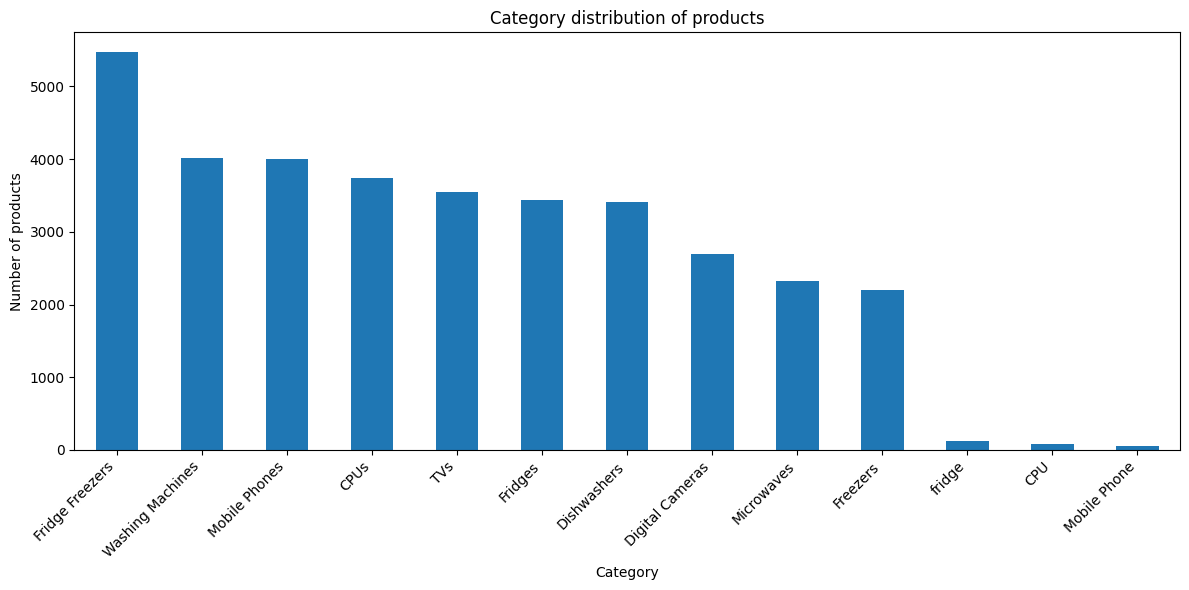

In [90]:
# Showing the category distribution
plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar')
plt.title('Category distribution of products')
plt.xlabel('Category')
plt.ylabel('Number of products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Starting the Machine Learning training process

In [91]:
# Variables
X = df['Product Title']
y = df[' Category Label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"The number of unique categories for training: {y_train.nunique()}")
print(f"The number of unique categories for test: {y_test.nunique()}")

# Pipelines for different models
pipelines = {
    'Logistic Regression': Pipeline([
        ('tfidf', TfidfVectorizer(min_df=2, max_features=10000)),
        ('clf', LogisticRegression(random_state=42, max_iter=1000))
    ]),
    'Multinomial NB': Pipeline([
        ('tfidf', TfidfVectorizer(min_df=2, max_features=10000)),
        ('clf', MultinomialNB(alpha=0.1))
    ]),
    'Decision Tree': Pipeline([
        ('tfidf', TfidfVectorizer(min_df=2, max_features=10000)),
        ('clf', DecisionTreeClassifier(random_state=42, max_depth=20))
    ]),
    'Random Forest': Pipeline([
        ('tfidf', TfidfVectorizer(min_df=2, max_features=10000)),
        ('clf', RandomForestClassifier(random_state=42, n_estimators=100, max_depth=20))
    ]),
    'Linear SVC': Pipeline([
        ('tfidf', TfidfVectorizer(min_df=2, max_features=10000)),
        ('clf', LinearSVC(random_state=42, max_iter=10000))
    ])
}


Training set size: 28076
Test set size: 7020
The number of unique categories for training: 13
The number of unique categories for test: 13


# Training and evaluating the models

In [92]:
results = {}
best_score = 0
best_model_name = ""

for name, pipeline in pipelines.items():
    print(f"\n{'='*50}")
    print(f"Training {name}...")
    print(f"{'='*50}")
    
    try:
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        
        
        report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
        results[name] = report['weighted avg']['f1-score']
        
        print(f"{name} F1 Score: {results[name]:.4f}")
        print(classification_report(y_test, y_pred, zero_division=0))
        
        # Verifying if it's the best model
        if results[name] > best_score:
            best_score = results[name]
            best_model_name = name
            
    except Exception as e:
        print(f"Error training {name}: {e}")
        results[name] = 0

# Choosing the model with the best F1 score
print(f"\n{'='*50}")
print("Final results:")
print(f"{'='*50}")
for name, score in results.items():
    print(f"{name}: {score:.4f}")

print(f"\nBest model: {best_model_name} with F1 score: {best_score:.4f}")


Training Logistic Regression...
Logistic Regression F1 Score: 0.9517
                  precision    recall  f1-score   support

             CPU       0.00      0.00      0.00        17
            CPUs       0.98      1.00      0.99       749
 Digital Cameras       0.99      0.99      0.99       538
     Dishwashers       0.95      0.95      0.95       681
        Freezers       1.00      0.93      0.96       440
 Fridge Freezers       0.93      0.95      0.94      1094
         Fridges       0.87      0.91      0.89       687
      Microwaves       0.99      0.96      0.98       466
    Mobile Phone       0.00      0.00      0.00        11
   Mobile Phones       0.95      0.99      0.97       801
             TVs       0.99      0.98      0.99       708
Washing Machines       0.96      0.95      0.95       803
          fridge       0.00      0.00      0.00        25

        accuracy                           0.96      7020
       macro avg       0.74      0.74      0.74      7020


In [93]:
# Training the final model on all data
print("\nTraining the best model on the entire dataset...")
best_model = pipelines[best_model_name]

final_model = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=2, max_features=10000)),
    ('clf', best_model.named_steps['clf'])
])

final_model.fit(X, y)


Training the best model on the entire dataset...


,steps,"[('tfidf', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None
